In [25]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [38]:
from_date = '2016-01-01'
to_date = '2016-03-01'
nasdaq = data.DataReader('^IXIC','yahoo',from_date,to_date)
apple = data.DataReader('AAPL','yahoo',from_date,to_date)
google = data.DataReader('GOOG','yahoo',from_date,to_date)

nasdaq_ret = nasdaq['Close'].pct_change()[1:]
apple_ret = apple['Close'].pct_change()[1:]
google_ret = google['Close'].pct_change()[1:]

In [40]:
apple_reg = LinearRegression()
google_reg = LinearRegression()

In [39]:
_nasdaq_ret = np.array(nasdaq_ret.tolist()).reshape(len(nasdaq_ret),1)
_apple_ret = np.array(apple_ret.tolist()).reshape(len(apple_ret),1)
_google_ret = np.array(google_ret.tolist()).reshape(len(google_ret),1)

In [41]:
apple_reg.fit(X=_nasdaq_ret,y=_apple_ret)
google_reg.fit(X=_nasdaq_ret,y=_google_ret)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

beta = 1.118279, alpha 0.000175


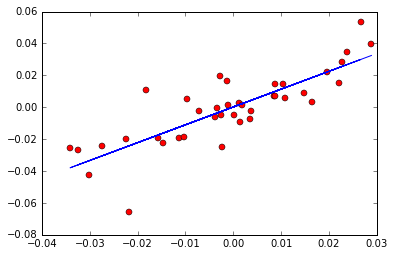

In [42]:
plt.plot(nasdaq_ret.tolist(),apple_ret.tolist(),'ro')
x = np.array(nasdaq_ret.tolist())
y = x*apple_reg.coef_[0,0] + apple_reg.intercept_[0]
plt.plot(x.tolist(),y.tolist())
print 'beta = %f, alpha %f' % (apple_reg.coef_[0,0],apple_reg.intercept_[0])

beta = 0.842305, alpha 0.000227


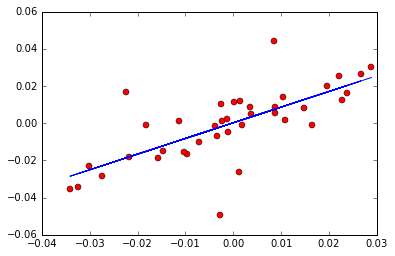

In [44]:
plt.plot(nasdaq_ret.tolist(),google_ret.tolist(),'ro')
x = np.array(nasdaq_ret.tolist())
y = x*google_reg.coef_[0,0] + google_reg.intercept_[0]
plt.plot(x.tolist(),y.tolist())
print 'beta = %f, alpha %f' % (google_reg.coef_[0,0],google_reg.intercept_[0])

In [52]:
rets = [ google_ret.tolist() , apple_ret.tolist() ]
print np.corrcoef(rets)

[[ 1.          0.53108583]
 [ 0.53108583  1.        ]]
